In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
%matplotlib inline

In [2]:
customer_data = pd.read_csv('BlackFriday.csv')

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Checking for Null Values

In [34]:
cat_2 = customer_data['Product_Category_2'].value_counts().sum()
cat_2

370591

In [28]:
(len(customer_data) - cat_2)/len(customer_data)*100

31.06271287648095

In [29]:
cat_3 = customer_data['Product_Category_3'].value_counts().sum()

In [30]:
(len(customer_data) - cat_3)/len(customer_data)*100

69.44102891306734

#### Dropping Null Columns as they have more than 5% missing values.

In [4]:
customer_data = customer_data.drop(columns=['Product_Category_2', 'Product_Category_3'], axis=1)

### Creating a Primary-Key based on 'User_ID' and 'Product_ID'

In [7]:
customer_data.User_ID.nunique()

5891

In [8]:
customer_data.Product_ID.nunique()

3623

In [5]:
user = customer_data['User_ID'].astype('str') 

In [6]:
product = customer_data['Product_ID'].astype('str')

In [7]:
customer_data['Unique_ID'] = user +' ' + product

In [8]:
# Dropping 'User_ID' and 'Product_ID' columns

customer_data = customer_data.drop(columns=['User_ID', 'Product_ID'], axis=1)

In [9]:
customer_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Unique_ID
0,F,0-17,10,A,2,0,3,8370,1000001 P00069042
1,F,0-17,10,A,2,0,1,15200,1000001 P00248942
2,F,0-17,10,A,2,0,12,1422,1000001 P00087842
3,F,0-17,10,A,2,0,12,1057,1000001 P00085442
4,M,55+,16,C,4+,0,8,7969,1000002 P00285442


In [17]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,537577.0,8.082710,6.524120,0.0,2.0,7.0,14.0,20.0
Marital_Status,537577.0,0.408797,0.491612,0.0,0.0,0.0,1.0,1.0
Product_Category_1,537577.0,5.295546,3.750701,1.0,1.0,5.0,8.0,18.0
Purchase,537577.0,9333.859853,4981.022133,185.0,5866.0,8062.0,12073.0,23961.0


#### Finding the range of Purchase

In [22]:
print(customer_data.Purchase.quantile(q=0.25))
print(customer_data.Purchase.quantile(q=0.5))
print(customer_data.Purchase.quantile(q=0.75))

5866.0
8062.0
12073.0


In [33]:
customer_data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Unique_ID'],
      dtype='object')

In [34]:
pd.DataFrame(customer_data, columns= ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Unique_ID']).to_csv('Customer_Data.csv')

### Re Enter the data

In [9]:
customer_data = pd.read_csv('Customer_Data.csv')

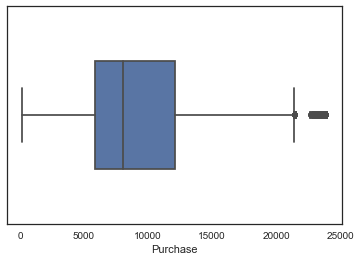

In [10]:
sns.boxplot(x = customer_data['Purchase'], width=0.5)

- Outliers exist in the Purchase Column

In [11]:
#### Outliers

customer_data.describe().T

q3 = np.quantile(a=customer_data.Purchase, q=0.75)
q1 = np.quantile(a=customer_data.Purchase, q=0.25)
iqr = q3 - q1
1.5*iqr

print('No of Outliers:',len(customer_data['Purchase'][customer_data['Purchase'] > (q3 + (1.5*iqr))]))

No of Outliers: 2665


## Purchase Distribution

C:\Users\IQbal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IQbal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


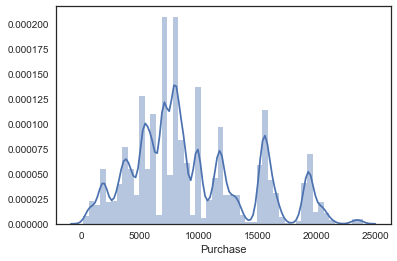

In [40]:
sns.distplot(customer_data['Purchase'])

In [11]:
skewness = (3*(customer_data['Purchase'].mean() - customer_data['Purchase'].median()))/(customer_data['Purchase'].std())

In [13]:
skewness

## Since skewness is positive, Hence right skewed.

0.7660234097113452

In [12]:
customer_data['sqrt'] = np.sqrt(customer_data['Purchase'])

In [13]:
customer_data['invSqrt'] = 1/ (np.sqrt(customer_data['Purchase']))

In [14]:
customer_data['log'] = np.log(customer_data['Purchase'])

In [15]:
skew_sqrt = (3*(customer_data['sqrt'].mean() - customer_data['sqrt'].median()))/(customer_data['sqrt'].std())

In [16]:
skew_inv = (3*(customer_data['invSqrt'].mean() - customer_data['invSqrt'].median()))/(customer_data['invSqrt'].std())

In [17]:
skew_log = (3*(customer_data['log'].mean() - customer_data['log'].median()))/(customer_data['log'].std())

In [18]:
print(skew_sqrt,'\n',skew_inv,'\n', skew_log)

0.35657075653136916 
 0.5030804714946393 
 -0.11491516838990029


In [19]:
from scipy import stats

In [20]:
x1 = customer_data['sqrt']

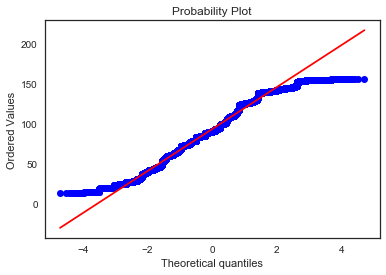

In [21]:
res = stats.probplot(x=x1, plot= plt)

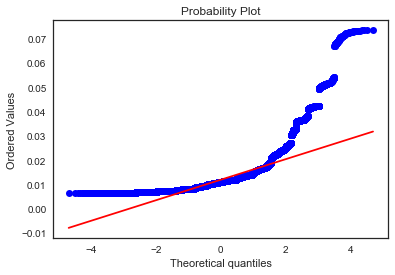

In [26]:
x2 = customer_data['invSqrt']

res2 = stats.probplot(x=x2, plot=plt)

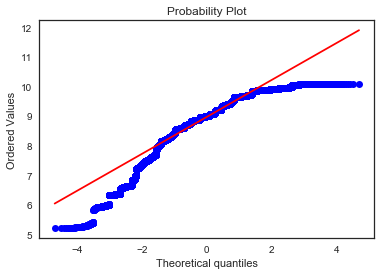

In [22]:
x3 = customer_data['log'] 

res3 = stats.probplot(x=x3, plot=plt)

#### Observation:
- The 'sqrt' transformation seems to be the best.

## ANOVA of Purchase based on Product Category

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [24]:
modeled = ols(formula= 'Purchase ~ C(Product_Category_1)', data=customer_data).fit()

aov_table = anova_lm(modeled, type = 2)
print(aov_table)

In [29]:
if aov_table['PR(>F)'][0] <0.05:
    print("The means are not equal, apply TUKEY-KRAMER's Test")
else:
    print("The means are equal")

The means are not equal, apply TUKEY-KRAMER's Test


In [31]:
mc = MultiComparison(customer_data.Purchase, customer_data.Product_Category_1)

In [32]:
result = mc.tukeyhsd()
print(result)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper    reject
--------------------------------------------------------
  1      2     -2352.0207  -2426.8586  -2277.1829  True 
  1      3     -3510.8598  -3591.3649  -3430.3546  True 
  1      4    -11278.8386 -11381.4998 -11176.1774  True 
  1      5     -7369.6975  -7409.3242  -7330.0707  True 
  1      6     2230.1921   2150.2388   2310.1454   True 
  1      7     2766.1287   2588.6899   2943.5674   True 
  1      8     -6110.3466  -6152.9666  -6067.7267  True 
  1      9     1930.5955   1402.1214   2459.0696   True 
  1      10    6072.2729    5920.054   6224.4917   True 
  1      11    -8924.7679  -8998.9878  -8850.5481  True 
  1      12   -12256.5059 -12429.2661 -12083.7457  True 
  1      13    -12885.082 -13031.6896 -12738.4744  True 
  1      14    -462.2495   -737.5945   -186.9045   True 
  1      15    1168.7207   1031.0619   1306.3796   True 
  1      16     1156.456   1045

In [33]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,537577.0,268788.000000,155185.257167,0.000000,134394.000000,268788.000000,403182.000000,537576.000000
Occupation,537577.0,8.082710,6.524120,0.000000,2.000000,7.000000,14.000000,20.000000
Marital_Status,537577.0,0.408797,0.491612,0.000000,0.000000,0.000000,1.000000,1.000000
Product_Category_1,537577.0,5.295546,3.750701,1.000000,1.000000,5.000000,8.000000,18.000000
Purchase,537577.0,9333.859853,4981.022133,185.000000,5866.000000,8062.000000,12073.000000,23961.000000
sqrt,537577.0,92.928960,26.421006,13.601471,76.589817,89.788641,109.877204,154.793411
invSqrt,537577.0,0.011960,0.004903,0.006460,0.009101,0.011137,0.013057,0.073521
log,537577.0,8.970239,0.644240,5.220356,8.676928,8.994917,9.398727,10.084183


In [34]:
modeled2 = ols(formula= 'Purchase ~ C(Occupation)', data=customer_data).fit()

aov_table = anova_lm(modeled2, type = 2)
print(aov_table)

                     df        sum_sq       mean_sq           F  PR(>F)
C(Occupation)      20.0  5.088787e+10  2.544393e+09  102.941701     0.0
Residual       537556.0  1.328669e+13  2.471684e+07         NaN     NaN


In [35]:
if aov_table['PR(>F)'][0] <0.05:
    print("The means are not equal, apply TUKEY-KRAMER's Test")
else:
    print("The means are equal")

The means are not equal, apply TUKEY-KRAMER's Test


In [38]:
mc2 = MultiComparison(customer_data.Purchase, customer_data.Occupation)
result2 = mc2.tukeyhsd(alpha=0.01)

print(result2)

 Multiple Comparison of Means - Tukey HSD,FWER=0.01 
group1 group2  meandiff    lower      upper   reject
----------------------------------------------------
  0      1    -169.2436  -289.7272   -48.7601  True 
  0      2    -161.0077  -306.8351   -15.1804  True 
  0      3     51.1306   -118.5538   220.8149 False 
  0      4      92.08     -15.0267   199.1867 False 
  0      5     201.9023    4.1803    399.6242  True 
  0      6     149.4319   -11.6581   310.5219 False 
  0      7     315.2285   202.349    428.1081  True 
  0      8     389.5618  -127.4417   906.5653 False 
  0      9    -472.6108  -738.3258  -206.8958  True 
  0      10   -134.1103  -327.5365   59.3159  False 
  0      11    112.5205   -89.9421   314.983  False 
  0      12    696.1057   558.4621   833.7493  True 
  0      13    237.5027   -4.6472    479.6526 False 
  0      14    381.5897   237.4882   525.6912  True 
  0      15    679.2932   480.3438   878.2426  True 
  0      16    270.1864   122.1266   418.2462 